Chapter 24

# 回归直线和椭圆
Book_5《统计至简》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

该代码使用鸢尾花数据集，通过可视化展示萼片长度（$sepal\ length$）和花瓣长度（$petal\ length$）之间的关系，并绘制回归线、协方差椭圆以及相关的统计三角形。代码首先计算萼片长度和花瓣长度的均值 $\mu_x$ 和 $\mu_y$、标准差 $\sigma_x$ 和 $\sigma_y$、协方差 $\text{cov}_{xy}$，以及相关系数 $\rho_{xy}$，然后用这些统计量生成可视化。

1. **回归线**：根据公式
   $$
   y = \mu_y + \frac{\rho_{xy} \sigma_y}{\sigma_x} (x - \mu_x)
   $$
   计算线性回归方程，并绘制回归线展示 $x$ 对 $y$ 的线性预测关系。

2. **三角形表示协方差结构**：通过画一个三角形展示数据的均值及标准差位置。三角形的顶点分别位于 $(\mu_x, \mu_y)$、$(\mu_x + \sigma_x, \mu_y)$、以及 $(\mu_x + \sigma_x, \mu_y + \rho_{xy} \sigma_y)$，以图示萼片和花瓣长度的协方差结构。

3. **协方差椭圆**：在中心点 $(\mu_x, \mu_y)$ 周围绘制协方差椭圆，展示数据的分布及其一标准差内的区域。椭圆由以下方程定义：
   $$
   \frac{(x - \mu_x)^2}{\sigma_x^2} - 2 \rho \frac{(x - \mu_x)(y - \mu_y)}{\sigma_x \sigma_y} + \frac{(y - \mu_y)^2}{\sigma_y^2} = 1
   $$
   椭圆的边界为一标准差区域，用以可视化数据的分布趋势和方向。

## 导入所需的库

In [1]:
import numpy as np  # 导入数值计算库NumPy
import matplotlib.pyplot as plt  # 导入绘图库Matplotlib
import pandas as pd  # 导入数据处理库Pandas
import seaborn as sns  # 导入数据可视化库Seaborn
from sklearn.datasets import load_iris  # 导入数据集加载函数

## 加载鸢尾花数据集

In [2]:
iris_sns = sns.load_dataset("iris")  # 使用Seaborn加载自带的iris数据集

In [3]:
iris_sns

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## 计算协方差矩阵和相关系数矩阵

In [4]:
SIGMA = iris_sns.iloc[:, :4].cov()  # 计算协方差矩阵
CORR = iris_sns.iloc[:, :4].corr()  # 计算相关系数矩阵
SIGMA = np.array(SIGMA)  # 转换为NumPy数组格式
CORR = np.array(CORR)  # 转换为NumPy数组格式

## 提取Sepal length和Petal length的协方差、均值和标准差

In [5]:
SIGMA_13 = SIGMA[[0, 2], :][:, [0, 2]]  # 提取sepal_length和petal_length的协方差矩阵
rho_x_y = CORR[0, 2]  # sepal_length和petal_length的相关系数
sigma_x = iris_sns['sepal_length'].std()  # 计算sepal_length的标准差
sigma_y = iris_sns['petal_length'].std()  # 计算petal_length的标准差
cov_xy = SIGMA_13[0, 1]  # 获取sepal_length和petal_length的协方差

mu_x = iris_sns['sepal_length'].mean()  # 计算sepal_length的均值
mu_y = iris_sns['petal_length'].mean()  # 计算petal_length的均值

## 回归直线计算

In [6]:
x_array = np.linspace(4, 8, 10)  # 生成从4到8的等间距数据点
y_reg_array = mu_y + rho_x_y * sigma_y / sigma_x * (x_array - mu_x)  # 计算回归直线的y值

## 绘制散点图与回归直线

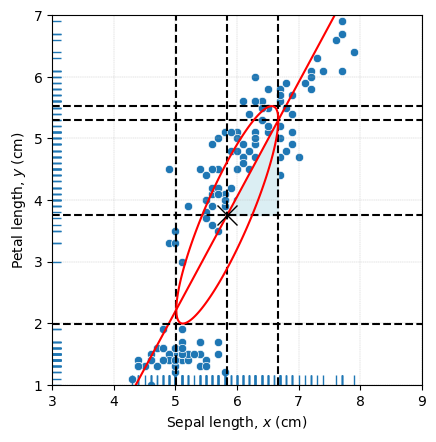

In [7]:
fig, ax = plt.subplots()  # 创建绘图窗口

# 绘制散点图和数据分布边际分布
ax = sns.scatterplot(data=iris_sns, x="sepal_length", y="petal_length")  
sns.rugplot(data=iris_sns, x="sepal_length", y="petal_length", ax=ax)

# 绘制三角形区域
triangle = np.array([[mu_x, mu_y], 
                     [mu_x + sigma_x, mu_y], 
                     [mu_x + sigma_x, mu_y + rho_x_y * sigma_y]])  # 三角形顶点
t1 = plt.Polygon(triangle, color='#DBEEF3')  # 创建三角形区域
plt.gca().add_patch(t1)  # 添加三角形到图中

# 绘制回归直线
plt.plot(x_array, y_reg_array, color='r')  # 绘制回归直线

# 绘制平均值与标准差的辅助线

plt.axvline(x=mu_x, linestyle='--', color='k')  # 绘制sepal_length的均值虚线
plt.axvline(x=mu_x - sigma_x, linestyle='--', color='k')  # sepal_length均值减去一个标准差
plt.axvline(x=mu_x + sigma_x, linestyle='--', color='k')  # sepal_length均值加上一个标准差

plt.axhline(y=mu_y, linestyle='--', color='k')  # 绘制petal_length的均值虚线
plt.axhline(y=mu_y + sigma_y * rho_x_y, linestyle='--', color='k')  # petal_length的均值加上相关系数倍数的标准差
plt.axhline(y=mu_y + sigma_y, linestyle='--', color='k')  # petal_length均值加上一个标准差
plt.axhline(y=mu_y - sigma_y, linestyle='--', color='k')  # petal_length均值减去一个标准差

plt.plot(mu_x, mu_y, color='k', marker='x', markersize=15)  # 绘制均值点的标记

# 设置轴标签和刻度

ax.set_xlabel('Sepal length, $x$ (cm)')  # 设置x轴标签
ax.set_ylabel('Petal length, $y$ (cm)')  # 设置y轴标签
ax.set_xticks(np.arange(3, 9 + 1, step=1))  # 设置x轴的刻度
ax.set_yticks(np.arange(1, 7 + 1, step=1))  # 设置y轴的刻度

ax.axis('scaled')  # 坐标轴缩放为等比例
ax.grid(linestyle='--', linewidth=0.25, color=[0.7, 0.7, 0.7])  # 设置网格样式

ax.set_xbound(lower=3, upper=9)  # 设置x轴显示范围
ax.set_ybound(lower=1, upper=7)  # 设置y轴显示范围

# 绘制相关椭圆

x = np.linspace(4, 8, num=201)  # 生成x方向的点
y = np.linspace(1, 7, num=201)  # 生成y方向的点

xx, yy = np.meshgrid(x, y)  # 创建网格，用于计算椭圆方程

rho = cov_xy / sigma_x / sigma_y  # 计算相关系数rho

ellipse = (((xx - mu_x) / sigma_x) ** 2 - 
           2 * rho * ((xx - mu_x) / sigma_x) * ((yy - mu_y) / sigma_y) + 
           ((yy - mu_y) / sigma_y) ** 2) / (1 - rho ** 2)  # 计算椭圆方程值

dd_one_sigma = np.sqrt(ellipse)  # 计算一标准差范围的椭圆

ax.contour(xx, yy, dd_one_sigma, levels=[1], colors='r')  # 绘制一标准差椭圆轮廓线